In [3]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import spatial
import xarray as xr

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [38]:
# to do: select only the applicable date from L4 
#    and try restrict lats and lons of l2 dataset

l4 = xr.open_dataset('../Data/cci_sst.nc')
l4 = l4.sel(time=slice('2009-12-18','2009-12-24'))

l2_list = glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200812*.nc')
l3_list = glob.glob('../Data/TSST/ESA_CCI_L3U_AATSR_200812*.nc')

# l2 = xr.open_dataset('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081218.nc')
# l2 = xr.open_mfdataset(glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200812*.nc'))

# l3 = xr.open_dataset('../Data/TSST/ESA_CCI_L3U_AATSR_20081218.nc')

In [39]:
# l4['analysis_uncertainty'][1]['time'].data
l2_list

['../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081218.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081220.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081219.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081221.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081222.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081223.nc',
 '../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_20081224.nc']

In [11]:
# l2_sel = l2.where(l2['latitude'] <= -10 and l2['latitude'] >= -50)
l2_sel = l2.where(l2['latitude'] <= -10)
l2_sel = l2.where(l2['latitude'] >= -50)
# l2.where(l2['latitude'].isin([-50, -10]), drop=True)


In [29]:
l2_sel = l2.where((l2['latitude'] <= -10) & (l2['latitude'] >= -50))
l2_sel = l2_sel.where((l2_sel['longitude'] <= 70) & (l2_sel['longitude'] >= 0))
l2_sel_arr = l2_sel.to_array()
# l2_sel = np.delete(l2_sel.to_array(), np.where(l2_sel['latitude'] == np.nan))

In [43]:
l2_sel_arr = np.delete(l2_sel_arr[1,], np.where(l2_sel_arr[1,] == np.nan))
# l2_sel_arr[1,]

In [44]:
l2_sel_arr

<xarray.DataArray (num_observations: 4436979)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    variable  <U18 'longitude'
Dimensions without coordinates: num_observations

In [12]:
l2_sel['latitude'].data.shape

(4436979,)

In [13]:
l2

<xarray.Dataset>
Dimensions:             (num_observations: 4436979)
Dimensions without coordinates: num_observations
Data variables:
    latitude            (num_observations) float32 63.367184 ... 69.004875
    longitude           (num_observations) float32 -19.831053 ... -53.650387
    along_track_SST     (num_observations) float32 ...
    standard_deviation  (num_observations) float32 ...
    hour                (num_observations) float32 ...
    minute              (num_observations) float32 ...
    second              (num_observations) float32 ...
Attributes:
    title:         Processed along-track ESA CCI L2P SST data from AVHRRMTA_G...
    source:        ESA CCI SST http://data.ceda.ac.uk/neodc/esacci/sst
    references:    https://github.com/sanAkel/Harry_uCapeTown/tree/master/ESA...
    date_created:  Year 2020

# Plot along-track point obs

## L2

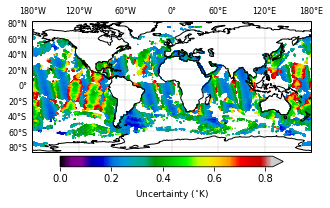

<Figure size 432x288 with 0 Axes>

In [7]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l2['longitude'], l2['latitude'], s=0.05, c=l2['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0)
cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
cbar.set_label('Uncertainty ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## L3

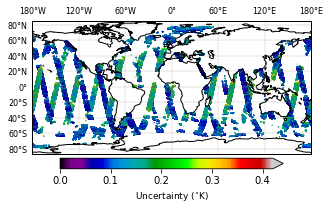

<Figure size 432x288 with 0 Axes>

In [6]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l3['longitude'], l3['latitude'], s=0.05, c=l3['standard_deviation'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0)
cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
cbar.set_label('Uncertainty ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

# Plot differences between L4 and TSSTs

## L4 vs L2

In [64]:
'''

The KDTree method used below is outlined at the link below:
   https://github.com/blaylockbk/pyBKB_v3/blob/master/demo/KDTree_nearest_neighbor.ipynb
with some minor modifications in order to produce the differences.

'''

# Create meshgrid for use with KDTree
x,y = np.meshgrid(*(l4['lon'], l4['lat']))

# Build KDTree from L4 grid
tree = spatial.KDTree(np.column_stack([x.ravel(), y.ravel()]))
# obs_tree = spatial.KDTree(l4['analysed_sst'])

# Gather obs coordinates into a numpy column stack
obs_points = np.column_stack([l2['longitude'], l2['latitude']])

# Obtain distances between L2 obs and nearest L4 cell and the index of the L4 cell as
#   recorded in the KDTree object (tree). Setting upper bound limits distances between
#   L2 obs and L4 cells and will speed up the operation.
dist, idx = tree.query(obs_points, distance_upper_bound=0.05)

# Squeeze L4 SSTs and then stack to obtain vector of temperatures to match shape of
#   L2 observations for easy differencing
l4_VecErrs = l4['analysis_uncertainty'].squeeze().stack(vectored=['lon', 'lat'])

# Obtain the difference between the L2 obs and the nearest L4 cell
error_diff_l2 = l2['standard_deviation'] - l4_VecErrs[idx-1].data

In [35]:
def NearestNeighbourDiff(grid, points, gridInf=1, pointsInf=1):
    ''' The KDTree method used below is outlined at the link below:
       https://github.com/blaylockbk/pyBKB_v3/blob/master/demo/KDTree_nearest_neighbor.ipynb
    with some minor modifications in order to produce the differences. '''
    
    # Try find lon and lat variables for gridded dataset
    try:
        gridLons = grid['longitude']
    except KeyError:
        try:
            gridLons  = grid['lon']
        except KeyError:
            print("Can't detect gridded dataset longitude dimension.")
            
    try:
        gridLats = grid['latitude']
    except KeyError:
        try:
            gridLats  = grid['lat']
        except KeyError:
            print("Can't detect gridded dataset latitude dimension.")
    
    # Try find lon and lat variables for point observations dataset
    try:
        pointsLons = points['longitude']
    except KeyError:
        try:
            pointsLons  = points['lon']
        except KeyError:
            print("Can't detect point observations longitude dimension.")
            
    try:
        pointsLats = points['latitude']
    except KeyError:
        try:
            pointsLats  = points['lat']
        except KeyError:
            print("Can't detect point observations latitude dimension.")
    
    # Create meshgrid for use with KDTree
    x,y = np.meshgrid(*(gridLons, gridLats))
    
    # Build KDTree from L4 grid
    print('Now building KDTree...')
    tree = spatial.KDTree(np.column_stack([x.ravel(), y.ravel()]))
    
    # Gather obs coordinates into a numpy column stack
    obs_points = np.column_stack([pointsLons, pointsLats])
    
    # Obtain distances between L2 obs and nearest L4 cell and the index of the L4 cell as
    #   recorded in the KDTree object (tree). Setting upper bound limits distances between
    #   L2 obs and L4 cells and will speed up the operation.
    print('Now querying KDTree for point observations...')
    dist, idx = tree.query(obs_points, distance_upper_bound=0.05)
    print('Tree query completed.')
    
    # Squeeze L4 SSTs and then stack to obtain vector of temperatures to match shape of
    #   L2 observations for easy differencing
    grid_VecErrs = grid['analysis_uncertainty'].squeeze().stack(vec=['lon', 'lat'])
    
    # Obtain the difference between the L2 obs and the nearest L4 cell
    error_diff = (points['standard_deviation'] * pointsInf) - (grid_VecErrs[idx-1].data * gridInf)
    
    return error_diff

0
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
1
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
2
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
3
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
4
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
5
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
6
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.


"\nproj = ccrs.PlateCarree()\nseasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']\n\nfig = plt.figure(figsize=(10,8))\nfig.suptitle('HYCOM$_{FREE}$ seasonal mean SST')\n\nfor s, i in enumerate(seasons):\n    \n    ax = plt.subplot(2,2,s+1,projection=proj)\n    \n    img = ds_free_seasonal_mean[s,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=33)\n    cbar = plt.colorbar(img, shrink=0.6, extend='both', orientation='horizontal', pad=0.02)\n    cbar.set_label('Temperature ($^{\\circ}$C)', fontsize=9)\n    ax.coastlines()\n    \n    # gridline work\n    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')\n    gl.xlabels_top = True\n    gl.xlabels_bottom = False\n    gl.ylabels_right = False\n    gl.xformatter = LONGITUDE_FORMATTER\n    gl.yformatter = LATITUDE_FORMATTER\n    gl.xlabel_style = {'size': 8}\n    gl.ylabel_style = {'size': 8}\n 

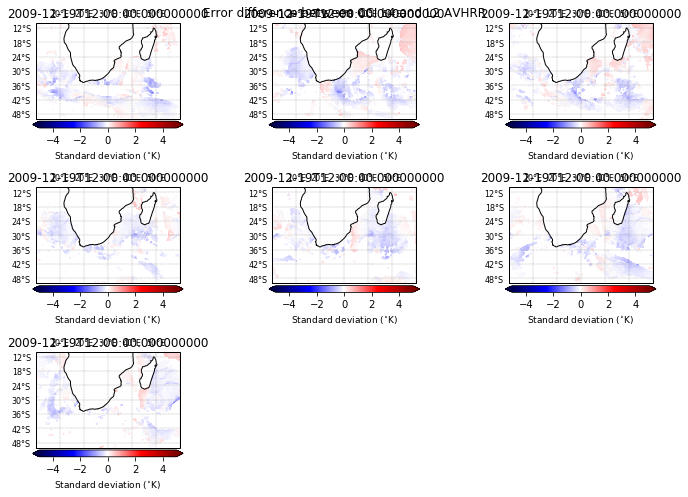

In [55]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,7))
fig.suptitle('Error difference between CCI L4 and L2 AVHRR')

for i in range(0,7):
    print(i)
    
    l2_dataset = xr.open_dataset(l2_list[i])
    errDiff = NearestNeighbourDiff(l4.isel(time=i), l2_dataset, gridInf=1, pointsInf=1)
    
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l2_dataset['longitude'], l2_dataset['latitude'], s=0.05, c=errDiff, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-5, vmax=5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=9)

    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(l4['analysis_uncertainty'][i]['time'].data), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
#     ax.set_title('{0}'.format(l4['analysis_uncertainty'][1]['time'].data))
    ax.set_title('')
    
# plt.savefig('../Figures/sst/SST_seasonalmean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

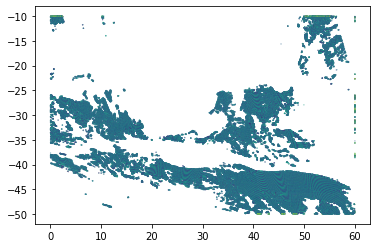

In [65]:
xs = tree.data[idx-1][:,0]
ys = tree.data[idx-1][:,1]
plt.scatter(xs, ys, s=0.05, c=dist)

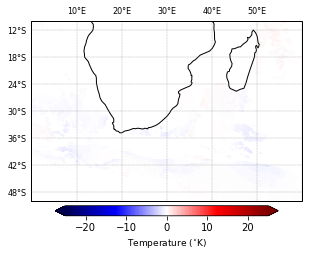

<Figure size 432x288 with 0 Axes>

In [66]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l2['longitude'], l2['latitude'], s=0.05, c=error_diff_l2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-25, vmax=25)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## L4 vs L3

0
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
1
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
2
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
3
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
4
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
5
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.
6
Now building KDTree...
Now querying KDTree for point observations...
Tree query completed.


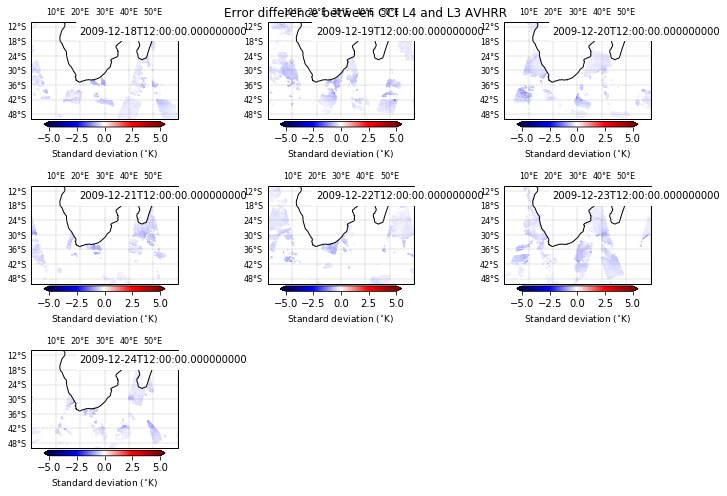

In [56]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,7))
fig.suptitle('Error difference between CCI L4 and L3 AVHRR')

for i in range(0,7):
    print(i)
    
    l3_dataset = xr.open_dataset(l3_list[i])
    errDiff = NearestNeighbourDiff(l4.isel(time=i), l3_dataset, gridInf=1, pointsInf=1)
    
    ax = plt.subplot(3,3,i+1,projection=proj)
    ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())
    
    img = plt.scatter(l3_dataset['longitude'], l3_dataset['latitude'], s=0.05, c=errDiff, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-5, vmax=5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Standard deviation ($^{\circ}$K)', fontsize=9)

    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(l4['analysis_uncertainty'][i]['time'].data), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
#     ax.set_title('{0}'.format(l4['analysis_uncertainty'][1]['time'].data))
    ax.set_title('')
    
# plt.savefig('../Figures/sst/SST_seasonalmean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

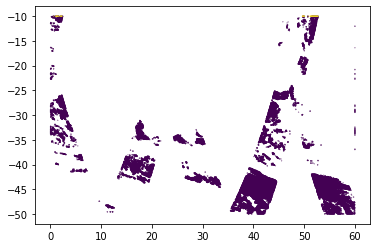

In [56]:
xs = tree.data[idx-1][:,0]
ys = tree.data[idx-1][:,1]
plt.scatter(xs, ys, s=0.05, c=dist)

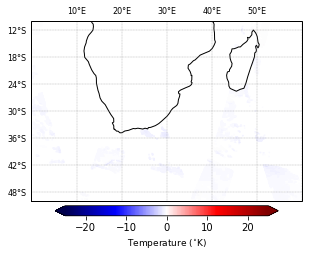

<Figure size 432x288 with 0 Axes>

In [69]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent([0, 60, -50, -10], ccrs.PlateCarree())

#gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# img = hycom_free_vel.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmax=130)
img = plt.scatter(l3['longitude'], l3['latitude'], s=0.05, c=error_diff_l3, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), vmin=-25, vmax=25)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$K)', fontsize=9)

ax.set_title('')
# plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/vel/VEL_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()